# 4.10 : Coding Etiquette & Excel Reporting

## - Consolidate results of Python analysis in a final report for stakeholders a population flow to demonstrate process of data cleaning

## Instacart Analysis Final

In [6]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
pd.options.display.float_format = '{:.2f}'.format

### 1.Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [7]:
path = r'C:\Users\nayla\Desktop\Carrer F\Curso de inmersion\unidad 4\10-2020 Instacart Basket Analysis\02 Data'

In [8]:
df=pd.read_pickle(os.path.join(path,'Prepared Data', 'Orders_products_all.pkl')) 


In [9]:
# make sure we don't have bad entries (price>40)
df['prices'].describe()

count   32400914.00
mean           7.79
std            4.24
min            1.00
25%            4.20
50%            7.40
75%           11.30
max           25.00
Name: prices, dtype: float64

In [10]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,frequency,frequency flag,name,surname,Gender,state,age,date_joined,n_dependants,income
0,1,Chocolate Sandwich Cookies,61,19,5.80,3139998,138,28,6,11.00,...,8.00,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,49620
1,1,Chocolate Sandwich Cookies,61,19,5.80,1977647,138,30,6,17.00,...,8.00,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,49620
2,907,Premium Sliced Bacon,106,12,20.00,3160996,138,1,5,13.00,...,8.00,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,49620
3,907,Premium Sliced Bacon,106,12,20.00,2254091,138,10,5,14.00,...,8.00,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,49620
4,1000,Apricots,18,10,12.90,505689,138,9,6,12.00,...,8.00,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,49620


In [11]:
departments_by_id=pd.read_csv(os.path.join(path,'Prepared Data', 'departments_wrangled.csv'),index_col=0).to_dict()['department']
departments_by_id

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

### 2.Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

This is a job that the names are false, they are only there to be able to carry out the case study, but if they were real I would have to delete my column and all the data that is on my computer

### 3.The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions). Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [12]:
#create a dicctionary
REGION1 = [
    "Maine",
    "New Hampshire",
    "Vermont",
    "Massachusetts",
    "Rhode Island",
    "Connecticut",
    "New York",
    "Pennsylvania",
    "New Jersey",
]

REGION2 = [
    "Wisconsin",
    "Michigan",
    "Illinois",
    "Indiana",
    "Ohio",
    "North Dakota",
    "South Dakota",
    "Nebraska",
    "Kansas",
    "Minnesota",
    "Iowa",
    "Missouri",
]

REGION3 = [
    "Delaware",
    "Maryland",
    "District of Columbia",
    "Virginia",
    "West Virginia",
    "North Carolina",
    "South Carolina",
    "Georgia",
    "Florida",
    "Kentucky",
    "Tennessee",
    "Mississippi",
    "Alabama",
    "Oklahoma",
    "Texas",
    "Arkansas",
    "Louisiana",
]


REGION4 = [
    "Idaho",
    "Montana",
    "Wyoming",
    "Nevada",
    "Utah",
    "Colorado",
    "Arizona",
    "New Mexico",
    "Alaska",
    "Washington",
    "Oregon",
    "California",
    "Hawaii",
]
    
STATE_TO_REGION_MAP = {}

for x in REGION1:
    STATE_TO_REGION_MAP[x] = "North East"

for x in REGION2:
    STATE_TO_REGION_MAP[x] = "Midwest"

for x in REGION3:
    STATE_TO_REGION_MAP[x] = "South"
    
for x in REGION4:
    STATE_TO_REGION_MAP[x] = "West"

STATE_TO_REGION_MAP

{'Maine': 'North East',
 'New Hampshire': 'North East',
 'Vermont': 'North East',
 'Massachusetts': 'North East',
 'Rhode Island': 'North East',
 'Connecticut': 'North East',
 'New York': 'North East',
 'Pennsylvania': 'North East',
 'New Jersey': 'North East',
 'Wisconsin': 'Midwest',
 'Michigan': 'Midwest',
 'Illinois': 'Midwest',
 'Indiana': 'Midwest',
 'Ohio': 'Midwest',
 'North Dakota': 'Midwest',
 'South Dakota': 'Midwest',
 'Nebraska': 'Midwest',
 'Kansas': 'Midwest',
 'Minnesota': 'Midwest',
 'Iowa': 'Midwest',
 'Missouri': 'Midwest',
 'Delaware': 'South',
 'Maryland': 'South',
 'District of Columbia': 'South',
 'Virginia': 'South',
 'West Virginia': 'South',
 'North Carolina': 'South',
 'South Carolina': 'South',
 'Georgia': 'South',
 'Florida': 'South',
 'Kentucky': 'South',
 'Tennessee': 'South',
 'Mississippi': 'South',
 'Alabama': 'South',
 'Oklahoma': 'South',
 'Texas': 'South',
 'Arkansas': 'South',
 'Louisiana': 'South',
 'Idaho': 'West',
 'Montana': 'West',
 'Wyoming':

In [13]:
#create a funtion (new column in df)
def map_state_to_region(state):
    return STATE_TO_REGION_MAP.get(state, "invalid")

df["region"] = df["state"].apply(map_state_to_region)


In [14]:
# check new column
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,frequency flag,name,surname,Gender,state,age,date_joined,n_dependants,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.80,3139998,138,28,6,11.00,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.80,1977647,138,30,6,17.00,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,49620,Midwest
2,907,Premium Sliced Bacon,106,12,20.00,3160996,138,1,5,13.00,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,49620,Midwest
3,907,Premium Sliced Bacon,106,12,20.00,2254091,138,10,5,14.00,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,49620,Midwest
4,1000,Apricots,18,10,12.90,505689,138,9,6,12.00,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,49620,Midwest


In [15]:
#Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)
ser1=df.groupby(['region', 'spending flag']).size()

Text(0, 0.5, 'Relative frequency of number of customers')

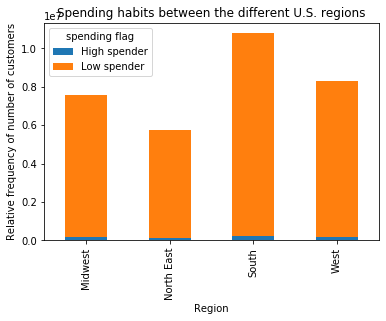

In [16]:
#create a plot 
Spendinghabits=ser1.unstack(fill_value=0).plot(kind="bar", stacked=True)
plt.title('Spending habits between the different U.S. regions')
plt.xlabel('Region')
plt.ylabel('Relative frequency of number of customers')


In [17]:
path2 = r'C:\Users\nayla\Desktop\Carrer F\Curso de inmersion\unidad 4\10-2020 Instacart Basket Analysis'

In [18]:
#export plot
Spendinghabits.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'Spendinghabits.png'))

### 4.The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [19]:
amount_of_orders_by_user=df.groupby('user_id')['order_id'].count()
amount_of_orders_by_user

user_id
1          59
2         195
3          88
4          18
5          37
         ... 
206205     32
206206    285
206207    223
206208    677
206209    129
Name: order_id, Length: 206209, dtype: int64

In [20]:
# users that will be excluded
amount_of_orders_by_user.loc[lambda x : x < 5]

user_id
196       3
490       4
569       3
619       4
627       4
         ..
204913    3
204940    3
205221    4
205562    4
205806    3
Name: order_id, Length: 799, dtype: int64

In [21]:
# amount of orders to drop
amount_of_orders_by_user.loc[lambda x : x < 5].sum()

2883

In [22]:
# convert to a dict so filtering is faster
users_to_drop = amount_of_orders_by_user.loc[lambda x : x < 5].to_dict()

In [23]:
df["Exclusion_flag"] = df["user_id"].apply(lambda x: x in users_to_drop)


In [24]:
df["Exclusion_flag"].value_counts()

False    32398031
True         2883
Name: Exclusion_flag, dtype: int64

In [26]:
orders_products_all = df.drop(df[df.Exclusion_flag == True].index)

In [27]:
orders_products_all["Exclusion_flag"]

0           False
1           False
2           False
3           False
4           False
            ...  
32406025    False
32406026    False
32406027    False
32406028    False
32406029    False
Name: Exclusion_flag, Length: 32398031, dtype: bool

In [28]:
# drop exclusiong flag column, we don´t need it anymore
orders_products_all.drop(columns="Exclusion_flag", inplace=True)
orders_products_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,frequency flag,name,surname,Gender,state,age,date_joined,n_dependants,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.80,3139998,138,28,6,11.00,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.80,1977647,138,30,6,17.00,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,49620,Midwest
2,907,Premium Sliced Bacon,106,12,20.00,3160996,138,1,5,13.00,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,49620,Midwest
3,907,Premium Sliced Bacon,106,12,20.00,2254091,138,10,5,14.00,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,49620,Midwest
4,1000,Apricots,18,10,12.90,505689,138,9,6,12.00,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,49620,Midwest


In [29]:
# export new df
orders_products_all.to_pickle(os.path.join(path,'Prepared Data', 'Orders_products_all.pkl'))

In [30]:
# add column with department name for nicer plotting
orders_products_all['department_name'] = orders_products_all['department_id'].apply(lambda x: departments_by_id[x])

### 5.The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the“orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### 6.Create an appropriate visualization to show the distribution of profiles.

In [ ]:
orders_products_all[["age","income","department_id","n_dependants","orders_day_of_week","order_hour_of_day" ]].describe().round(0)


In [ ]:
def age_map(age):
    if age < 33:
        return "young"
    if age < 65:
        return "adult"
    return "retired"

def family_map(n_dependants):
    if n_dependants < 1:
        return "single"
    if n_dependants < 2:
        return "couple"
    return "family"

def income_map(income):
    if income < 96800: # < 50%
        return "low"
    if income < 128000: # < 75%
        return "medium"
    return "high" # > 75%

AGES = ["young", "adult", "retired"]
FAMILIES = ["single", "couple", "family"]
INCOMES = ["low", "medium", "high"]
PROFILE_SORT = []

PROFILE_MAP = dict()
for age in AGES:
    PROFILE_MAP[age] = dict()
    for family in FAMILIES:
        PROFILE_MAP[age][family] = dict()
        for income in INCOMES:
            PROFILE_MAP[age][family][income] = "%s %s %s" % (age,  family, income) # age + " " + family  ....
            PROFILE_SORT.append("%s %s %s" % (age,  family, income))
            
def profile_map(age_category, family_category, income_category):
    return PROFILE_MAP[age_category][family_category][income_category]


In [ ]:
orders_products_all["age_category"] = orders_products_all["age"].apply(age_map, 0)

In [ ]:
orders_products_all["family_category"] = orders_products_all["n_dependants"].apply(family_map, 0)

In [ ]:
orders_products_all["income_category"] = orders_products_all["income"].apply(income_map, 0)

In [ ]:
orders_products_all["profile"] = [profile_map(age, family, income) for age, family, income in zip(orders_products_all['age_category'], orders_products_all['family_category'],orders_products_all['income_category'])]


# Profiles


### A profile that interests us is the age of our buyers by region.

In [ ]:
distribution_age_region=pd.crosstab(orders_products_all['age_category'], orders_products_all['region'])

In [ ]:
distribution_age_region

In [ ]:
distribution_age_region=distribution_age_region.plot(
    kind = "bar",
    stacked = False,
    figsize = (12,8),
    title = "Distribution age vs region")
plt.xlabel('Age of customers')
plt.ylabel('Sales')


In [ ]:
# Export visualizations
distribution_age_region.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'distribution_age_region.png'))

### Profile income vs age_category

In [ ]:
distribution_income_age=pd.crosstab(orders_products_all['income_category'], orders_products_all['age_category'])


In [ ]:
distribution_income_age

In [ ]:
distribution_income_age=distribution_income_age.plot(
    kind = "bar",
    stacked = False,
    figsize = (12,8),
    title = "Distribution income vs age")  
plt.xlabel('Income of customers')
plt.ylabel('Sales')



In [ ]:
# Export visualizations
distribution_income_age.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'distribution_income_age.png'))

### 7.Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [ ]:
users_data = orders_products_all.groupby(
        ['user_id', 'age_category', 'family_category', 'income_category', 'region']
    )['prices'].\
    agg({'frequency': 'count', 'expenditure': 'sum'}).\
    reset_index()

In [ ]:
users_data

#### Frequency and expenditure by family composition

In [ ]:
users_data.groupby("family_category")[["frequency", "expenditure"]].agg(["max", "mean", "min"])

#### Frequency and expenditure by income

In [ ]:
users_data.groupby("income_category")[["frequency", "expenditure"]].agg(["max", "mean", "min"])

#### Frequency and expenditure by age 

In [ ]:
users_data.groupby("age_category")[["frequency", "expenditure"]].agg(["max", "mean", "min"])

#### Frequency and expenditure by region

In [ ]:
users_data.groupby("region")[["frequency", "expenditure"]].agg(["max", "mean", "min"])

### 8.Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### 9. Produce suitable charts to illustrate your results and export them in your project folder.

#### Department_name_vs_region

In [ ]:
frequency_department_name_vs_region = pd.crosstab(
        orders_products_all['department_name'],
        orders_products_all['region'], 
)
frequency_department_name_vs_region.head()

In [ ]:
frequency_department_name_vs_region_sorted = frequency_department_name_vs_region.sort_values('Midwest', ascending=False)

In [ ]:
frequency_department_name_vs_region_plot = frequency_department_name_vs_region_sorted.plot(
    kind = "bar",
    stacked = True,
    figsize = (12,8),
    
    title = "Amount of units sold by department per region"
)     
plt.xlabel('Department')
plt.ylabel('Sales')



In [ ]:
# Export visualizations
frequency_department_name_vs_region_plot.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'frequency_department_name_vs_region.png'))

#### Department_name vs age_category

In [ ]:
frequency_department_name_vs_age_category = pd.crosstab(
        orders_products_all['department_name'],
        orders_products_all['age_category'], 
)
frequency_department_name_vs_age_category.head()
frequency_department_name_vs_age_category_sorted = frequency_department_name_vs_age_category.sort_values('adult', ascending=False)

In [ ]:
frequency_department_name_vs_age_category_sorted = frequency_department_name_vs_age_category_sorted.plot(
    kind = "bar",
    stacked = True,
    figsize = (12,8),

    title = "Amount of units sold by department and age category"
    
)
plt.ylabel('Sales')

In [ ]:
# Export visualizations
frequency_department_name_vs_age_category_sorted.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'frequency_department_name_vs_age_category.png'))

#### Department_name vs family_category

In [ ]:
frequency_department_name_vs_family_category = pd.crosstab(
        orders_products_all['department_name'],
        orders_products_all['family_category'], 
).sort_values('couple', ascending=True)
frequency_department_name_vs_family_category.head()

In [ ]:
frequency_department_name_vs_family_category = frequency_department_name_vs_family_category.plot(
    kind = "bar",
    stacked = True,
    figsize = (12,8),
    title = "Amount of units sold by department and family category")
plt.ylabel('Sales')

In [ ]:
# Export visualizations
frequency_department_name_vs_family_category.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'frequency_department_name_vs_family_category.png'))

# Project questions (that were not answered in the previous steps)

### 1.The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.


In [ ]:
busy_day_and_hours = pd.crosstab(
        orders_products_all['order_hour_of_day'], 
        orders_products_all['orders_day_of_week'],
)
busy_day_and_hours.head()

In [ ]:
DAYS = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
busy_day_and_hours = busy_day_and_hours.plot(
    kind = "bar",
    stacked = True,
    figsize = (12,8),
    title = "busy_day_and_hours")
plt.legend(DAYS)
plt.ylabel('Sales')


In [ ]:
# Export visualizations
busy_day_and_hours.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'busy_day_and_hours.png'))

### 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.


In [43]:
price_data = orders_products_all. \
    groupby(
        ['prices'],
        as_index=True,
    )['prices'].agg(
        {
            "frequency": ["count"],
       }
    )

price_data.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  import sys


AttributeError: 'DataFrame' object has no attribute 'get_legend'

In [33]:
price_data

,frequency
,count
prices,
1.00,115114
1.10,242729
1.20,256245
1.30,425645
1.40,392175
...,...
24.60,1962
24.70,7283


Text(0, 0.5, 'Sales')

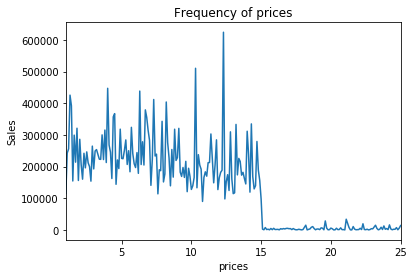

In [46]:
price = price_data.plot(legend=None,
   title = "Frequency of prices")

plt.ylabel('Sales')

 



In [47]:
# Export visualizations
price.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'price.png'))

### 4.Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.


In [48]:
department_profile = orders_products_all. \
    groupby(
        ['department_id'],
        as_index=False,
    ).agg(
        {
            "frequency": "count"
            
        }
    )
department_profile

,department_id,frequency
0,1,2234539
1,2,36283
2,3,1172359
3,4,9478763
4,5,153677
5,6,269244
6,7,2687384
7,8,97710
8,9,866608
9,10,34570


In [49]:
department_profile.sort_values(by ='frequency', ascending = False,  inplace = True)
department_profile['department_name'] = department_profile.department_id.apply(lambda x: departments_by_id[x])
department_profile

,department_id,frequency,department_name
3,4,9478763,produce
15,16,5393262,dairy eggs
18,19,2887289,snacks
6,7,2687384,beverages
0,1,2234539,frozen
12,13,1875218,pantry
2,3,1172359,bakery
14,15,1068013,canned goods
19,20,1051193,deli
8,9,866608,dry goods pasta


Text(0, 0.5, 'Frequency of product orders')

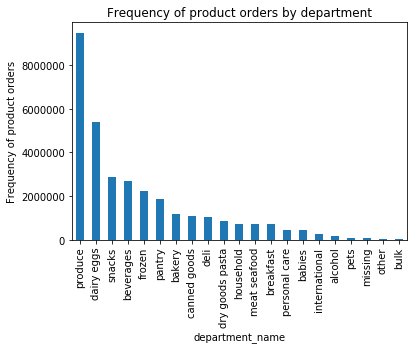

In [51]:
data=department_profile[['department_name', 'frequency']]
Frequency_of_product_orders_by_departmentdata = data.plot(
    kind="bar",
    x = 'department_name',
    y = 'frequency',
    title = 'Frequency of product orders by department',
    legend = False)
plt.ylabel('Frequency of product orders')


In [52]:
# Export visualizations
Frequency_of_product_orders_by_departmentdata.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'Frequency_of_product_orders_by_departmentdata.png'))

### 5.2 Are there differences in ordering habits based on a customer’s loyalty status?

In [77]:
frequency_department_name_vs_loyalty_flag = pd.crosstab(
        orders_products_all['orders_day_of_week'],
        orders_products_all['loyalty_flag'], 
)
frequency_department_name_vs_loyalty_flag.head()

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,1754582,1279859,3168688
1,1843199,1066755,2749033
2,1352187,813898,2046788
3,1266363,730896,1842365
4,1291900,694279,1796786


Text(0, 0.5, 'Frequency of product orders')

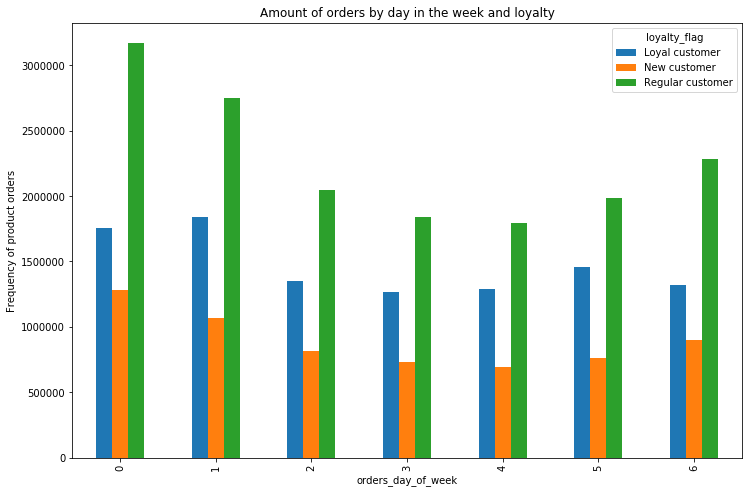

In [78]:
frequency_department_name_vs_loyalty_flag = frequency_department_name_vs_loyalty_flag.plot(
    kind = "bar",
    stacked = False,
    figsize = (12,8),
    title = "Amount of orders by day in the week and loyalty")
plt.ylabel('Frequency of product orders')





In [79]:
# Export visualizations
frequency_department_name_vs_loyalty_flag.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'frequency_department_name_vs_loyalty_flag.png'))

In [80]:
# export new df
orders_products_all.to_pickle(os.path.join(path,'Prepared Data', 'Orders_products_all.pkl'))